In [1]:
import pandas as pd
import numpy as np
import math
import re
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from google_drive_downloader import GoogleDriveDownloader as gdd
from pathlib import Path



In [2]:
DATA_PATH = 'datasets/dataset1.csv'
if not Path(DATA_PATH).is_file():
    gdd.download_file_from_google_drive(
        file_id='1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk',
        dest_path=DATA_PATH,
    )

In [3]:
df = pd.read_csv(DATA_PATH, encoding = "ISO-8859-1", engine='python')

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)
df.tail(20)

,message,label
2094,Leaving for school.........gonna comment some ...,0
2857,@officialnjonas looking forward to evry song l...,0
5701,@__MrsA__ Shahhht ahhhhp!,0
199,@Kevinmiam Thanks! I'll take inspiration from ...,0
6985,@Lilimich My pleasure!,0
4699,@ashleytisdalex so are u being in HSM 4 i gue...,0
1996,@sfee i know... hee hee,0
5531,Making Mary Kay appts. and taking care of a si...,0
6161,@RyanStar All my friends already follow you! I...,0
2733,@LizJonasHQ he does? that's awesooooooooomeeee...,0


# Preprocessing

In [5]:
# removing mentions, links, tags

import re

def preprocessing(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
    text = re.sub(r'@[-)]+', '', text)            # removing @mentions
    text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'http?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'#', '', text )              # removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)         # removing RT
    text = re.sub(r'&[a-z;]+', '', text)        # removing '&gt;'
    return text



In [6]:
df['message'] = df['message'].apply(preprocessing)

In [7]:
df.head()

,message,label
2566,That is super epic awful. GO SHOPPING!,0
7458,"lol anytime, i know ill be helping u out lots...",0
3128,brothers: i love u in your next tour please c...,0
5867,aw im new to this haha hope its fun,0
2003,"No nothing planned really, hopfully if the we...",0


## Vectorization

In [9]:
dataset = df
unique_label = np.unique(df["label"])
num_classes = len(unique_label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['message'].values, pd.get_dummies(dataset['label']).values, test_size=0.2)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(train_seq, maxlen=100)
pad_test = pad_sequences(test_seq, maxlen=100)



## Model

In [11]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=pad_train.shape[1]))
model.add(LSTM(128, activation= 'tanh', return_sequences=True))
model.add(LSTM(128, activation= 'tanh', return_sequences=True))
model.add(LSTM(128, activation= 'tanh'))
model.add(Dense(2, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

epochs = 10
batch_size = 64

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 128)          131584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 128)          131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 2,955,010
Trainable params: 2,955,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
result = model.fit(pad_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
129/129 [==============================] - 17s 71ms/step - loss: 0.2058 - accuracy: 0.9235
Epoch 2/10
129/129 [==============================] - 8s 64ms/step - loss: 0.0169 - accuracy: 0.9962
Epoch 3/10
129/129 [==============================] - 8s 64ms/step - loss: 0.0057 - accuracy: 0.9990
Epoch 4/10
129/129 [==============================] - 8s 64ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 5/10
129/129 [==============================] - 8s 65ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 6/10
129/129 [==============================] - 8s 65ms/step - loss: 0.0046 - accuracy: 0.9990
Epoch 7/10
129/129 [==============================] - 8s 65ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 8/10
129/129 [==============================] - 8s 65ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 9/10
129/129 [==============================] - 8s 65ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 10/10
129/129 [==============================] - 8s 64ms/step - loss: 0.0023 - accur

In [14]:
evaluation = model.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

65/65 [==============================] - 3s 30ms/step - loss: 0.0211 - accuracy: 0.9956
Accuracy is :  99.56374168395996


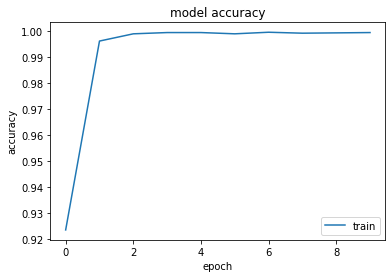

In [15]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

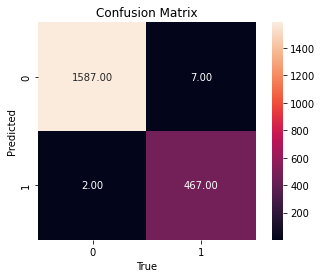

In [16]:
y_pred = model.predict(pad_test)

new_y_pred = np.argmax(y_pred, axis=1)
new_y_test = np.argmax(y_test, axis=1)

conf_arr = np.zeros((num_classes, num_classes))

for i in range(len(new_y_pred)):
        conf_arr[new_y_pred[i]][new_y_test[i]] += 1

df_cm = pd.DataFrame(conf_arr, index = unique_label, columns = unique_label)



fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

res = sb.heatmap(df_cm, annot=True, fmt='.2f')

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [17]:
print(classification_report(new_y_test, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1589
           1       1.00      0.99      0.99       474

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [18]:
precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print(precision)
print(f1_score)
print(recall)

99.57356076759062
99.04559915164369
98.52320675105484


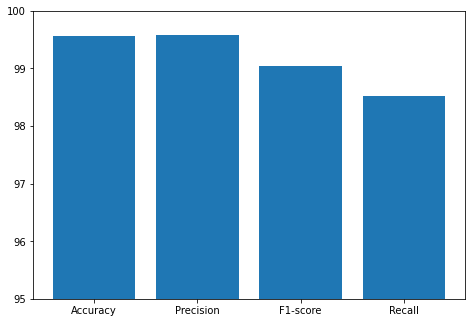

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [accuracy,precision,f1_score,recall]
ax.bar(label,value)
plt.ylim(95,100)
plt.show()